# Historical neutrino masses from  WMAP-9 and SDSS-I

Importance sampling of WMAP-9 chains using Lya P1D from SDSS-I

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
from getdist import plots,loadMCSamples
import matplotlib.pyplot as plt
from cup1d.planck import planck_chains
from cup1d.interface import marg_lya_like
# because of black magic, the order of the imports here matters
%matplotlib inline

### Read extended CMB chains from WMAP

These chains are already provided in cup1d, form different CMB releases. All chains have free neutrino mass.

In [2]:
wmap9=planck_chains.get_planck_2013(model='base_mnu',data='WMAP')
wmap9['label']='WMAP 9'

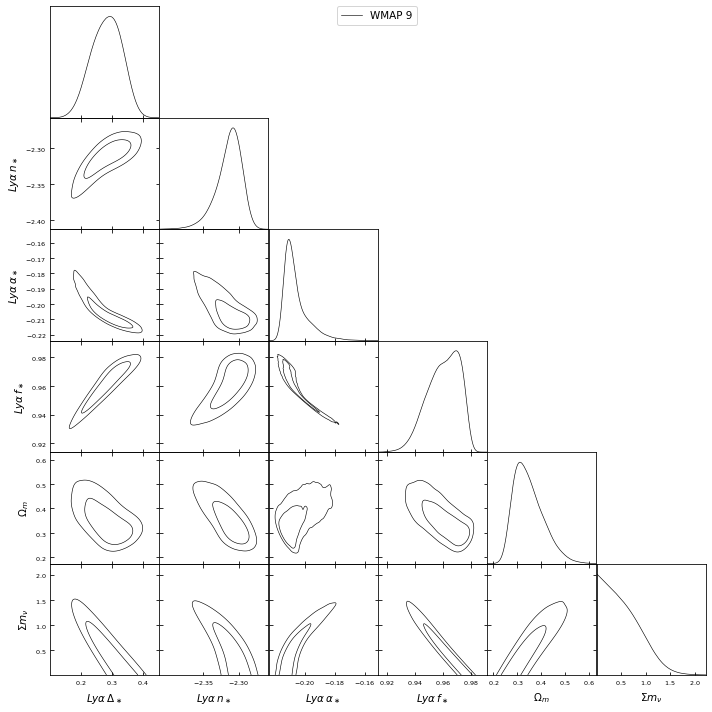

In [3]:
# plot also neutrino mass (for nuLCDM)
g = plots.getSubplotPlotter(width_inch=10)
g.settings.axes_fontsize = 10
g.settings.legend_fontsize = 14
g.triangle_plot(wmap9['samples'],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','omegam','mnu'],
                legend_labels=['WMAP 9'])

### Plot linear power parameters from chain and from Lya likelihoods

In [4]:
# create grid (note j in number of elements, crazy python)
thresholds = [2.30,6.17,11.8]
neff_grid,DL2_grid = np.mgrid[-2.5:-2.1:100j, 0.2:0.6:100j]
chi2_Mc2005=marg_lya_like.gaussian_chi2_McDonald2005(neff_grid,DL2_grid)
chi2_PD2015=marg_lya_like.gaussian_chi2_PalanqueDelabrouille2015(neff_grid,DL2_grid)
chi2_Ch2019=marg_lya_like.gaussian_chi2_Chabanier2019(neff_grid,DL2_grid)

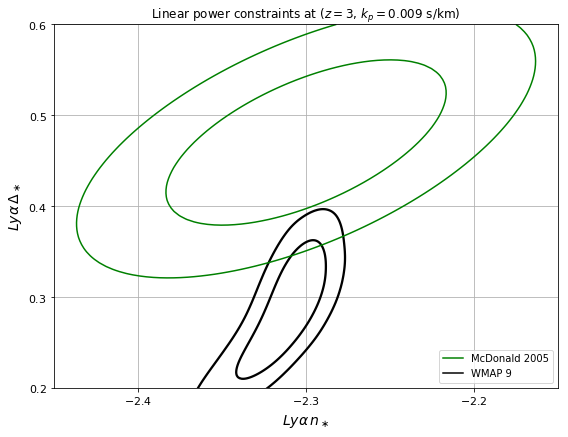

In [5]:
g = plots.getSinglePlotter(width_inch=8)
g.plot_2d(wmap9['samples'], ['linP_n_star', 'linP_DL2_star'],lims=[-2.45,-2.15,0.2,0.6])
plt.contour(neff_grid,DL2_grid,chi2_Mc2005,levels=thresholds[:2],colors='green')
plt.axhline(y=1,color='green',label='McDonald 2005')
plt.axhline(y=1,color='black',label=wmap9['label'])
plt.title(r'Linear power constraints at ($z=3$, $k_p=0.009$ s/km)')
plt.grid()  
plt.legend(loc=4)

### Importance sampling of WMAP-9 chains using McDonald et al. (2005) likelihood (Gaussian approximation)

In [6]:
new_samples=wmap9['samples'].copy()
p=new_samples.getParams()
new_loglike = 0.5*marg_lya_like.gaussian_chi2_McDonald2005(p.linP_n_star,p.linP_DL2_star)
new_samples.reweightAddingLogLikes(new_loglike) #re-weight cut_samples to account for the new likelihood

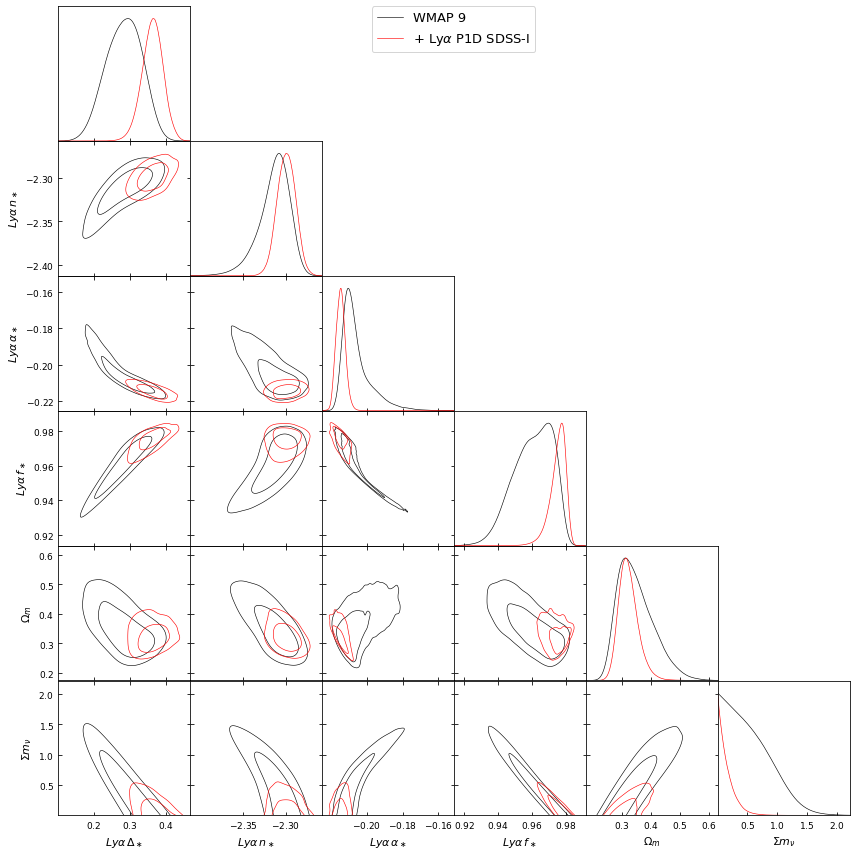

In [7]:
g = plots.getSubplotPlotter(width_inch=12)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([wmap9['samples'],new_samples],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','omegam','mnu'],
                legend_labels=['WMAP 9',r'+ Ly$\alpha$ P1D SDSS-I'])

### Show how very massive neutrinos are ruled out when adding Lyman alpha

The reason why the SDSS-I measurement of P1D was so good at constraining neutrinos, is because it reported a fairly large value of the amplitude of the linear power, while WMAP9 wanted a low amplitude.

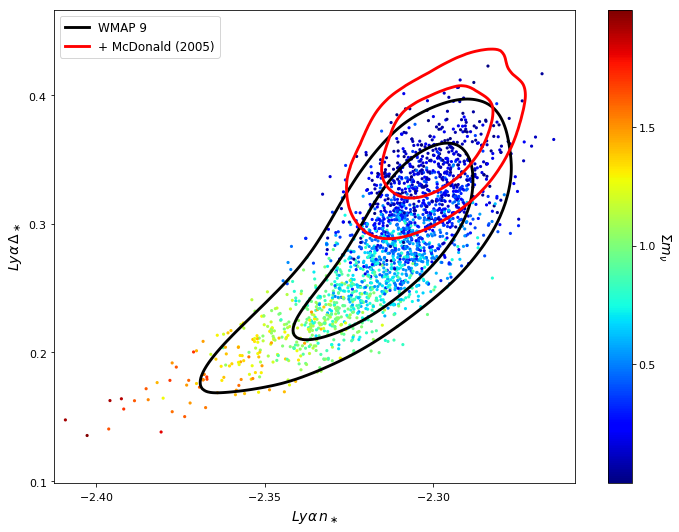

In [8]:
g = plots.getSinglePlotter(width_inch=10)
g.plot_3d(wmap9['samples'], ['linP_n_star', 'linP_DL2_star', 'mnu'],scatter_size=10)
g.plot_2d([wmap9['samples'],new_samples], 'linP_n_star', 'linP_DL2_star', filled=False)
g.add_legend([wmap9['label'],'+ McDonald (2005)'],legend_loc='upper left')